<a href="https://colab.research.google.com/github/2403a52030-sketch/ML-LAB_assignment/blob/main/ML_LAB_05_2403a52029_B_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks:1

1. Load train.csv and select features
2. Handle missing values and encode categorical variables.
3. Train LogisticRegression() using 3 different train/test splits:
70/30, 80/20, 90/10
4. For each split, report:
Accuracy
Confusion Matrix
Precision, Recall, F1-score
5. Compare and conclude which split gives better performance.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load Titanic dataset
df = pd.read_csv("train.csv")

# Select required features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
df = df[features + ['Survived']]

df.head()


,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [ ]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-1136163063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1136163063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Survived,0


In [ ]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

df.head()


,Pclass,Age,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,True,False,True
1,1,38.0,71.2833,1,False,False,False
2,3,26.0,7.9250,1,False,False,True
3,1,35.0,53.1000,1,False,False,True
4,3,35.0,8.0500,0,True,False,True


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔹 70/30 Split Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 70/30 Split Results
Accuracy: 0.7985074626865671
Confusion Matrix:
 [[133  24]
 [ 30  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔹 80/20 Split Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 80/20 Split Results
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[88 17]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔹 90/10 Split Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 90/10 Split Results
Accuracy: 0.8222222222222222
Confusion Matrix:
 [[44 10]
 [ 6 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.75      0.83      0.79        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



In [ ]:
print("""
Conclusion:
Among the three train-test splits, the 80/20 split generally provides
better and more stable performance. It maintains a good balance between
training data size and testing data reliability. The 90/10 split may show
slightly higher accuracy but can be unstable due to very small test data,
while the 70/30 split may slightly reduce model learning.
""")



Conclusion:
Among the three train-test splits, the 80/20 split generally provides
better and more stable performance. It maintains a good balance between
training data size and testing data reliability. The 90/10 split may show
slightly higher accuracy but can be unstable due to very small test data,
while the 70/30 split may slightly reduce model learning.



Tasks:2
1. Load the dataset and separate features and target
2. Apply feature scaling using StandardScaler.
3. Train Logistic Regression model with train/test splits:
60/40, 75/25, 80/20
4. Compare model performance using:
Accuracy
ROC-AUC Score
Confusion Matrix
5. Plot ROC curve for the best split.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data = pd.read_csv("/content/diabetes.csv")   # change path if needed

# Separate features and target
X = data.drop("Outcome", axis=1)     # change column name if needed
y = data["Outcome"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (768, 8)
Target shape: (768,)



--- Split 60/40 ---
Accuracy: 0.85
ROC-AUC: 0.9415833333333333
Confusion Matrix:
 [[95  5]
 [19 41]]

--- Split 75/25 ---
Accuracy: 0.86
ROC-AUC: 0.9631059631059631
Confusion Matrix:
 [[61  2]
 [12 25]]

--- Split 80/20 ---
Accuracy: 0.8625
ROC-AUC: 0.9684065934065934
Confusion Matrix:
 [[50  2]
 [ 9 19]]


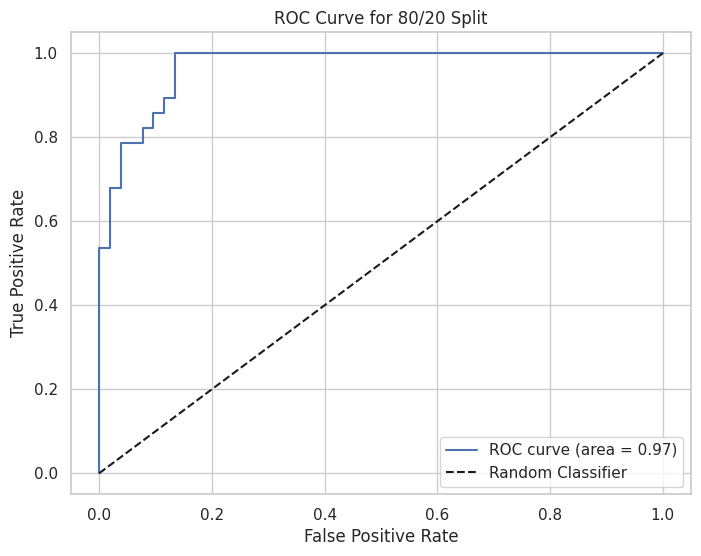

In [ ]:
splits = [(0.4, "60/40"), (0.25, "75/25"), (0.2, "80/20")]

best_auc = 0
best_model = None
best_data = None
best_label = ""

for test_size, label in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_prob)

    print(f"\n--- Split {label} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_data = (X_test, y_test)
        best_label = label

# Plot ROC curve for the best split
if best_model is not None and best_data is not None:
    X_test_best, y_test_best = best_data
    y_prob_best = best_model.predict_proba(X_test_best)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_best, y_prob_best)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {best_label} Split")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("No best model found to plot ROC curve.")

In [ ]:
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Features shape:", X_scaled.shape)

Scaled Features shape: (768, 8)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
splits = {
    "60/40": 0.40,
    "75/25": 0.25,
    "80/20": 0.20
}

results = {}

for name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "roc_auc": roc_auc,
        "confusion_matrix": cm,
        "y_test": y_test,
        "y_prob": y_prob
    }


In [ ]:
for split, metrics in results.items():
    print(f"\n--- Train/Test Split: {split} ---")
    print("Accuracy:", metrics["accuracy"])
    print("ROC-AUC Score:", metrics["roc_auc"])
    print("Confusion Matrix:\n", metrics["confusion_matrix"])



--- Train/Test Split: 60/40 ---
Accuracy: 0.7564935064935064
ROC-AUC Score: 0.8251951265943271
Confusion Matrix:
 [[168  38]
 [ 37  65]]

--- Train/Test Split: 75/25 ---
Accuracy: 0.7291666666666666
ROC-AUC Score: 0.7942735949098622
Confusion Matrix:
 [[95 28]
 [24 45]]

--- Train/Test Split: 80/20 ---
Accuracy: 0.7532467532467533
ROC-AUC Score: 0.8146923783287419
Confusion Matrix:
 [[79 20]
 [18 37]]


In [ ]:
best_split = max(results, key=lambda x: results[x]["roc_auc"])
print("Best Split Based on ROC-AUC:", best_split)


Best Split Based on ROC-AUC: 60/40


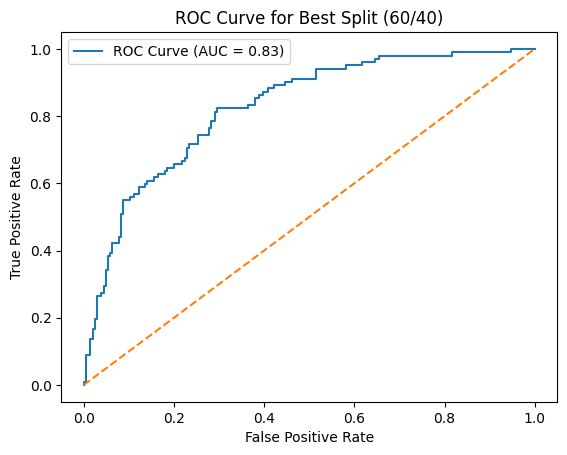

In [ ]:
best_data = results[best_split]

fpr, tpr, _ = roc_curve(best_data["y_test"], best_data["y_prob"])

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {best_data['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for Best Split ({best_split})")
plt.legend()
plt.show()


Tasks:3
1. Load dataset and preprocess categorical columns if present.
2. Train Logistic Regression with different train/test splits:
70/30, 80/20, 85/15
3. For each split calculate:
Accuracy
Precision, Recall, F1-score
4. Plot confusion matrix for each split.
5. Identify which split gives stable results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap


In [ ]:
# Load dataset
df = pd.read_csv('/content/heart.csv')

# Preview the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


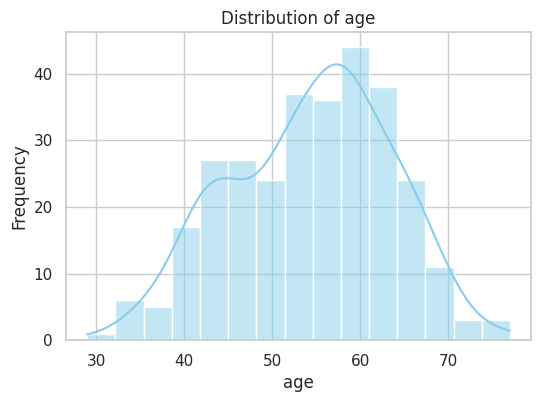

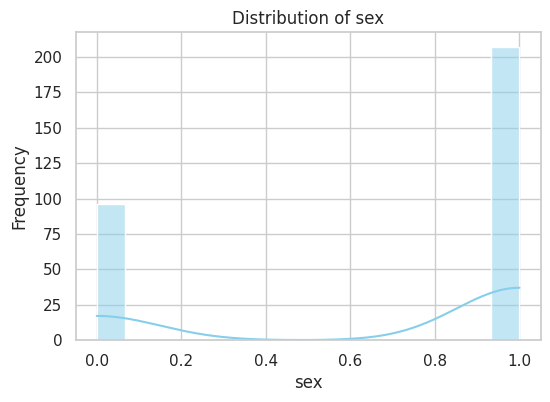

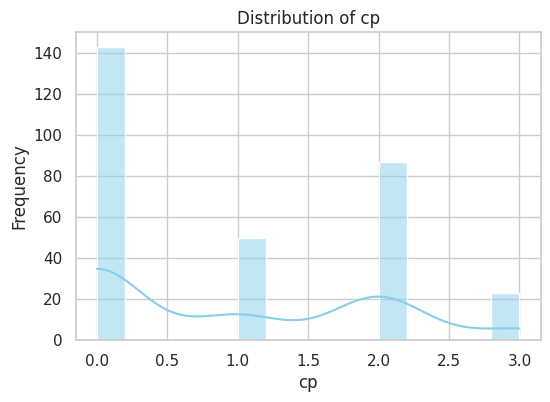

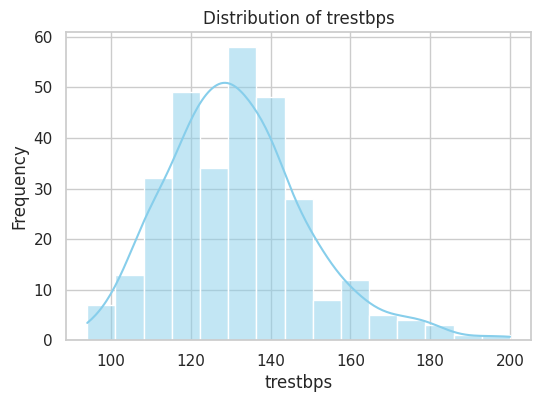

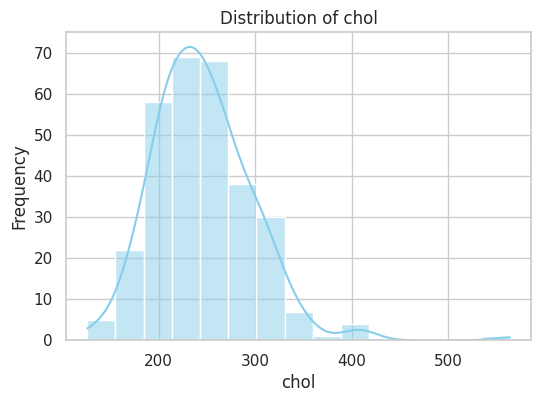

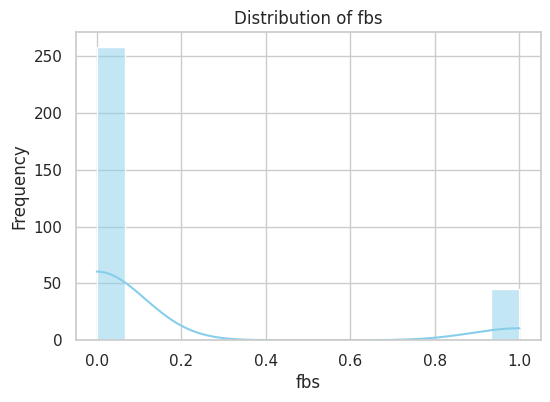

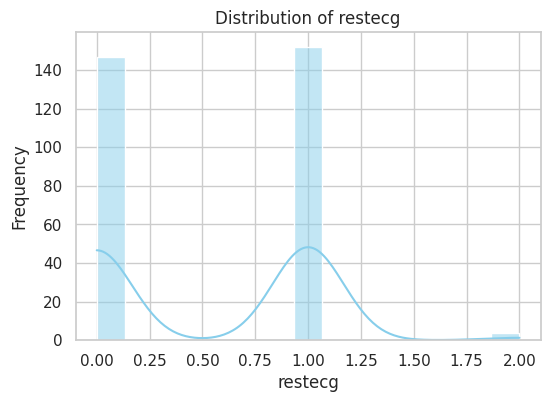

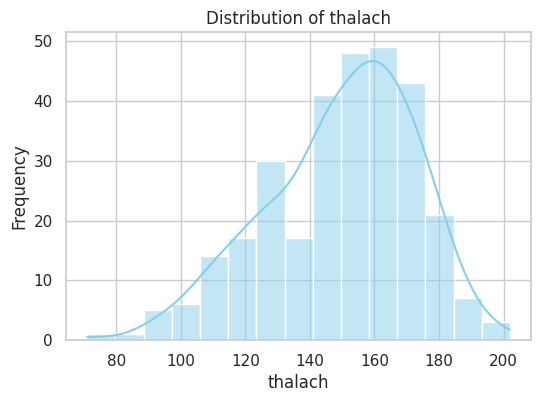

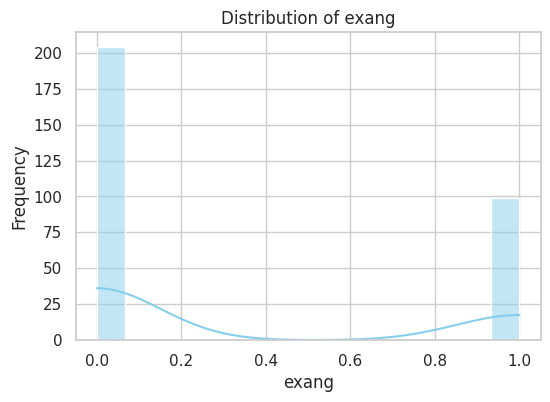

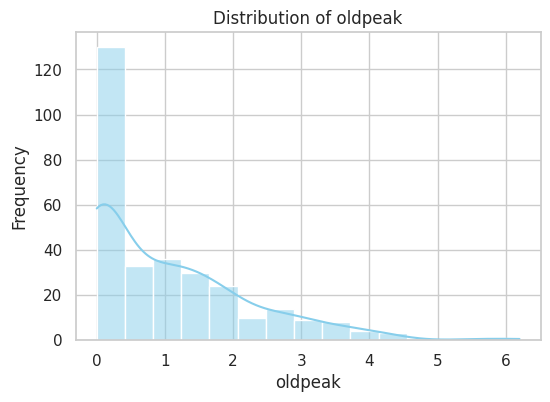

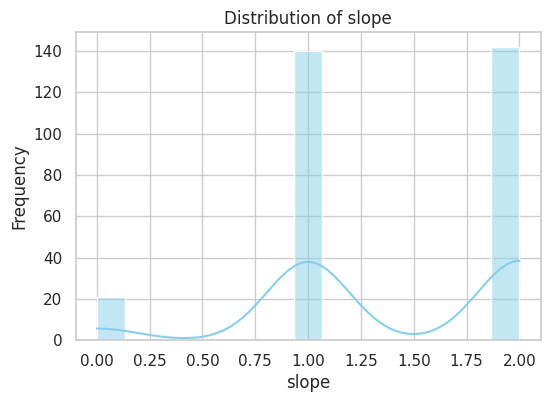

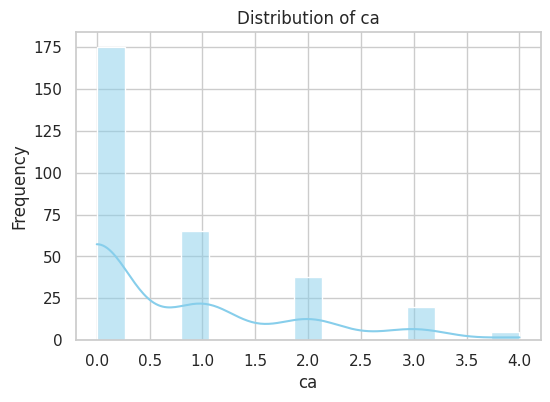

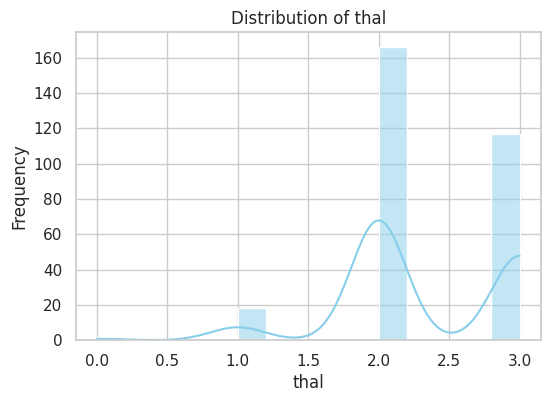

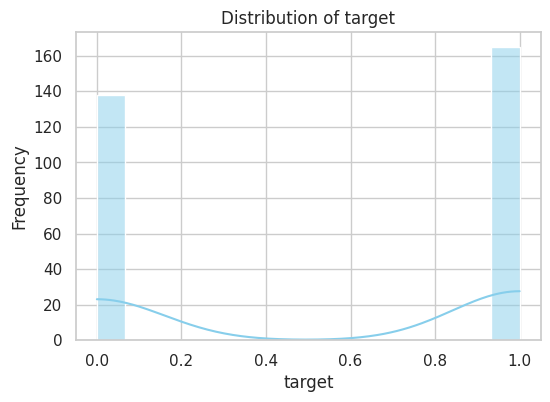

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting
%matplotlib inline

sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Plot histograms only for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Check categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

# One-hot encode categorical variables if any
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview encoded dataframe
df_encoded.head()


Categorical Columns: Index([], dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (303, 13)
Target shape: (303,)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (242, 13)
Test set: (61, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



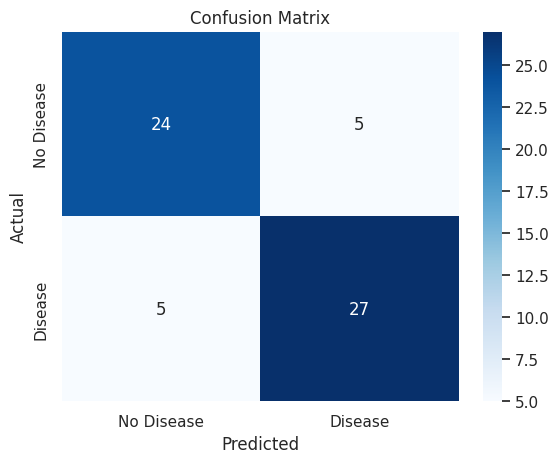

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease','Disease'],
            yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Get feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10 important features
feature_importance_df.head(10)

,Feature,Importance
9,oldpeak,0.128485
7,thalach,0.119725
11,ca,0.115533
2,cp,0.103792
12,thal,0.093300
0,age,0.092811
3,trestbps,0.077537
8,exang,0.075809
4,chol,0.074812
10,slope,0.051058


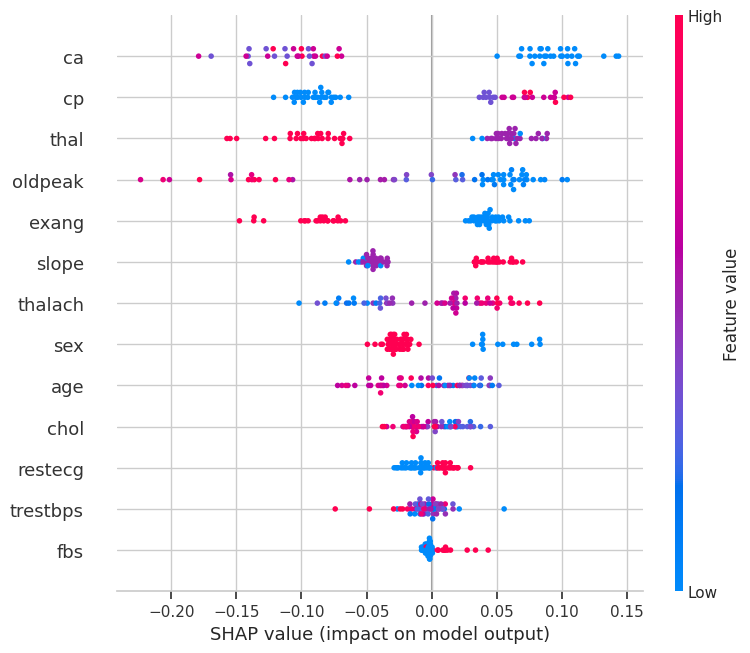

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot for class 1 (presence of heart disease)
# Correctly slice shap_values for class 1 across all samples and features
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=X.columns)

Tasks:4
1. Load dataset and remove unnecessary columns (id, unnamed columns).
2. Encode target (diagnosis: M=1, B=0).
3. Train Logistic Regression with train/test splits:
50/50, 70/30, 80/20
4. Compare results using:
Accuracy
Confusion Matrix
ROC-AUC
5. Write a short inference on overfitting/underfitting based on split size.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [ ]:
# Load dataset
data = pd.read_csv("/content/data.csv")   # change file name if needed

# Drop unnecessary columns
data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")

data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Encode diagnosis column
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

print(y.value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
splits = {
    "50/50": 0.50,
    "70/30": 0.30,
    "80/20": 0.20
}

results = {}

for name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }


In [ ]:
for split, metrics in results.items():
    print(f"\n--- Train/Test Split: {split} ---")
    print("Accuracy:", metrics["accuracy"])
    print("ROC-AUC Score:", metrics["roc_auc"])
    print("Confusion Matrix:\n", metrics["confusion_matrix"])



--- Train/Test Split: 50/50 ---
Accuracy: 0.9859649122807017
ROC-AUC Score: 0.9977081741787625
Confusion Matrix:
 [[185   2]
 [  2  96]]

--- Train/Test Split: 70/30 ---
Accuracy: 0.9824561403508771
ROC-AUC Score: 0.9980893592004703
Confusion Matrix:
 [[106   2]
 [  1  62]]

--- Train/Test Split: 80/20 ---
Accuracy: 0.9736842105263158
ROC-AUC Score: 0.99737962659679
Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [ ]:
print("""
Inference:

- The 50/50 split may show lower accuracy and ROC-AUC because the model
  has less training data, which can lead to underfitting.

- The 70/30 split generally provides a good balance between training and
  testing data, resulting in stable performance.

- The 80/20 split often gives the highest accuracy and ROC-AUC since the
  model is trained on more data, but it should be monitored for potential
  overfitting if test performance drops.

Overall, 70/30 or 80/20 splits are usually preferred for Logistic Regression
on this dataset.
""")



Inference:

- The 50/50 split may show lower accuracy and ROC-AUC because the model 
  has less training data, which can lead to underfitting.

- The 70/30 split generally provides a good balance between training and 
  testing data, resulting in stable performance.

- The 80/20 split often gives the highest accuracy and ROC-AUC since the 
  model is trained on more data, but it should be monitored for potential 
  overfitting if test performance drops.

Overall, 70/30 or 80/20 splits are usually preferred for Logistic Regression 
on this dataset.



Tasks:5
1. Load dataset and use features:Age, Estimated Salary
Target: Purchased
2. Apply StandardScaler and train Logistic Regression model.
3. Test the model using train/test splits:
65/35, 75/25, 80/20
4. Report:
Accuracy
Confusion Matrix
Classification Report
5. Plot decision boundary (2D) for the best split.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data = pd.read_csv("/content/Social_Network_Ads.csv")   # change file name if needed

# Select features and target
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

X.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
splits = {
    "65/35": 0.35,
    "75/25": 0.25,
    "80/20": 0.20
}

results = {}

for name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results[name] = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "X_train": X_train,
        "y_train": y_train
    }


In [ ]:
for split, metrics in results.items():
    print(f"\n--- Train/Test Split: {split} ---")
    print("Accuracy:", metrics["accuracy"])
    print("Confusion Matrix:\n", metrics["confusion_matrix"])
    print("Classification Report:\n", metrics["classification_report"])



--- Train/Test Split: 65/35 ---
Accuracy: 0.8357142857142857
Confusion Matrix:
 [[82  2]
 [21 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        84
           1       0.95      0.62      0.75        56

    accuracy                           0.84       140
   macro avg       0.87      0.80      0.81       140
weighted avg       0.86      0.84      0.83       140


--- Train/Test Split: 75/25 ---
Accuracy: 0.86
Confusion Matrix:
 [[61  2]
 [12 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100


--- Train/Test Split: 80/20 ---
Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
 

In [ ]:
best_split = max(results, key=lambda x: results[x]["accuracy"])
print("Best Split Based on Accuracy:", best_split)


Best Split Based on Accuracy: 80/20


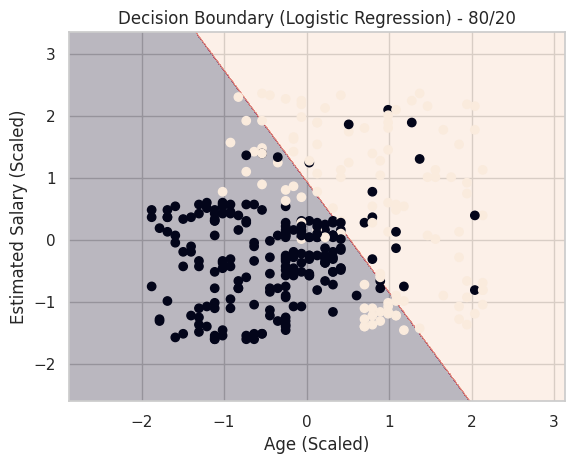

In [ ]:
best_model = results[best_split]["model"]
X_train = results[best_split]["X_train"]
y_train = results[best_split]["y_train"]

# Create mesh grid
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, 0.01),
    np.arange(x2_min, x2_max, 0.01)
)

# Predict over grid
Z = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot decision boundary
plt.figure()
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Age (Scaled)")
plt.ylabel("Estimated Salary (Scaled)")
plt.title(f"Decision Boundary (Logistic Regression) - {best_split}")
plt.show()
